<a href="https://colab.research.google.com/github/ibonetc/Esp_IA/blob/main/DeepLearning/Copia_de_IA_DL_Filtros_Rasgos_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizar filtros y rasgos en una red VGG16

Existen varias redes ya entrenadas, que pueden ser utilizadas. Por ejemplo VGG16 es una red entrenada para clasificar imágenes, fue entrenado sobre la base de datos ImageNet que tiene más de 15 millones de imágenes etiquetadas de alta resolución que pertenecen a aproximadamente 22,000 categorías.

Las capas inferiores aprenden características de bajo nivel como esquinas, bordes, mientras que las capas medias aprenden color, forma, etc. y las capas superiores aprenden características de alto nivel que representan el objeto en la imagen.

## Visualizar los filtros de la red

In [1]:
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16

In [2]:
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Mostrar los filtros usados en las capas convoluciones.

Las capas convoluciones tiene un la subcadena conv en el nombre (layer.name)

In [3]:
for layer in model.layers:
	# Capas convolucionales
	if 'conv' not in layer.name:
		continue
	# Obtener pesos de filtros
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


Por ejemplo para los 6 primeros filtros, de los 64, para la primera capa oculta:

In [7]:
plt.figure(figsize=(10,10))
# Pesos de la primera capa oculta
filters, biases = model.layers[1].get_weights()
# normalizar los valores de filtro a 0-1 (para visualizarlos)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Primeros filtros
n_filters, ix = 6, 1

for i in range(n_filters):
	# obtener el filtro i
	f = filters[:, :, :, i]
	for j in range(3):
		print(f[:, :, j])
		ix += 1

[[0.8601116  0.81635594 0.47662497]
 [0.7392438  0.55478704 0.23765364]
 [0.47966576 0.31966972 0.25103468]]
[[0.9545779  0.8683965  0.4609779 ]
 [0.7946921  0.55631167 0.17024457]
 [0.47875416 0.2662131  0.145611  ]]
[[0.89960235 0.8437643  0.4736674 ]
 [0.767142   0.5637889  0.20940173]
 [0.48481962 0.3017171  0.19757837]]
[[0.6161919  0.65118545 0.63058364]
 [0.6404719  0.6826218  0.6508931 ]
 [0.6256226  0.65861547 0.63294035]]
[[0.5408773  0.5615535  0.5572666 ]
 [0.5488246  0.5759833  0.56070673]
 [0.5493164  0.56731075 0.55763006]]
[[0.3896376  0.39145148 0.40397066]
 [0.37799242 0.38582882 0.3883068 ]
 [0.39486766 0.39434877 0.40186328]]
[[0.55114007 0.52590066 0.43417358]
 [0.6507926  0.6467724  0.45429817]
 [0.53464687 0.52460825 0.42663756]]
[[0.6017826  0.5647105  0.4450579 ]
 [0.7126644  0.69669527 0.47241867]
 [0.58391243 0.5625993  0.43700036]]
[[0.5539096  0.5206881  0.41671643]
 [0.65472686 0.6426892  0.43874004]
 [0.5367759  0.51834106 0.40804785]]
[[0.80131894 0.7422

<Figure size 720x720 with 0 Axes>

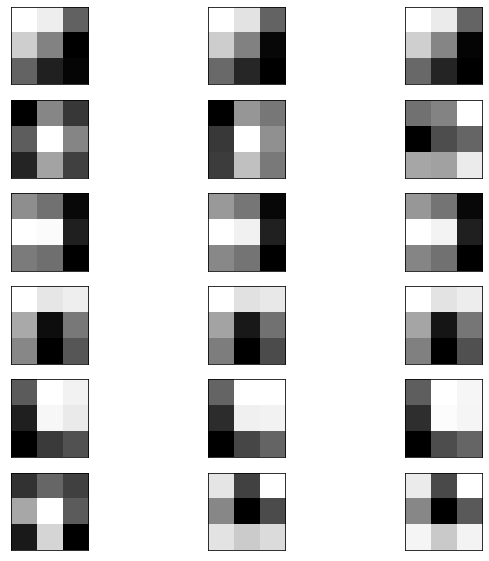

In [5]:
plt.figure(figsize=(10,10))
# Pesos de la primera capa oculta
filters, biases = model.layers[1].get_weights()
# normalizar los valores de filtro a 0-1 (para visualizarlos)
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Graficar los primeros filtros
n_filters, ix = 6, 1

for i in range(n_filters):
	# obtener el filtro i
	f = filters[:, :, :, i]
	# graficar los canales por separado
	for j in range(3):
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# graficar canal de filtro en escala de grises
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

## Visualizar mapas de rasgos en una imagen

Los mapas de activación, llamados mapas de rasgos, capturan el resultado de aplicar los filtros a la entrada, como la imagen de entrada u otro mapa de rasgos.


Visualizar un mapa de rasgos nos ayuda a entender qué rasgos se detectan cerca de la entrada y cuáles se van detectando más a la salida.

Podemos escoger cualquier imagen para probar cómo se van detectando rasgos.


Vamos a mostrar todas las capas en el modelo e imprimir el tamaño del mapa de características para cada capa convolucional, así como el índice de capa en el modelo.

In [4]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	if 'conv' not in layer.name:
		continue

	print(i, layer.name, layer.output.shape) # índice de capa, nombre de la capa y tamaño de salida (mapa de rasgos)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


Podemos crear un nuevo modelo que tenga la misma entrada y como salida la primera capa convolucional

In [5]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from numpy import expand_dims

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


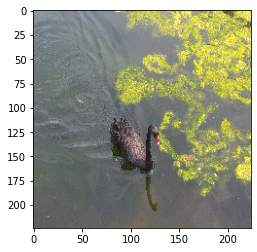

In [19]:
# Cargar la imagen con el tamaño requerido por la red (224x224)
img = load_img('/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg', target_size=(224, 224))
plt.imshow(img)

In [13]:
len(model.layers)

23

In [14]:
model.layers

In [20]:
# Crear un nuevo modelo, con las entradas y como salida la primera capa
newmodel = Model(inputs=model.inputs, outputs=model.layers[1].output)
newmodel.summary()

# Convertir imagen a array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# preparar la imagen (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# obtener el mapa de rasgos para la primera capa
feature_maps = newmodel.predict(img)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


<Figure size 1080x1080 with 0 Axes>

In [21]:
feature_maps.shape

(1, 224, 224, 64)

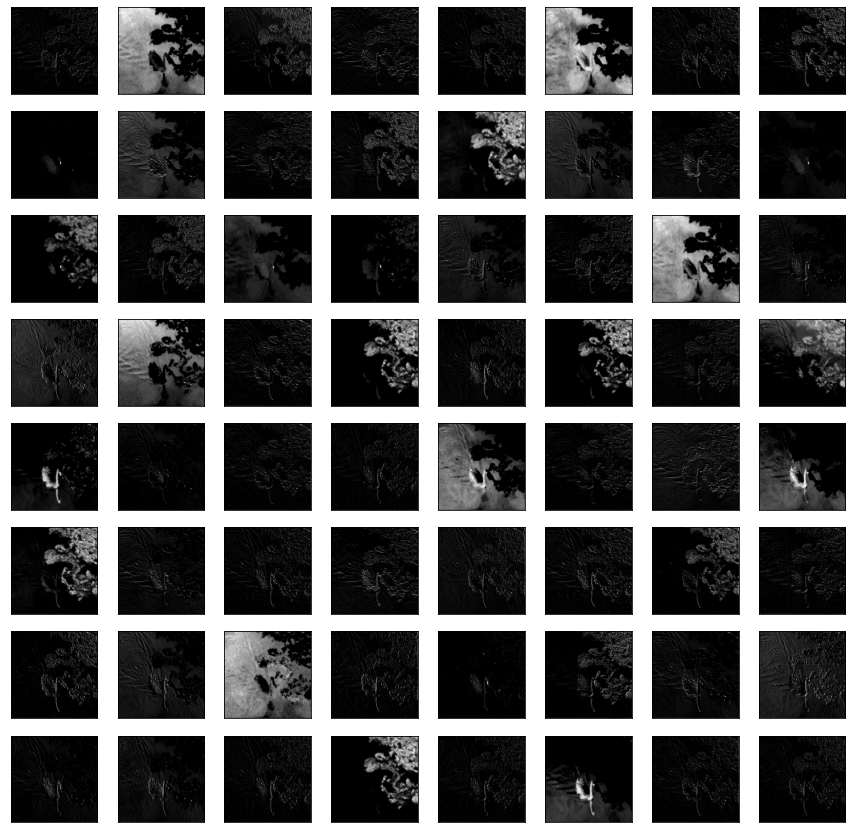

In [24]:
# graficar los 64 mapas (gráfica de 8x8)
plt.figure(figsize=(15,15))
N = 8
index = 1
for i in range(N):
	for j in range(N):
		ax = plt.subplot(N, N, index)
		ax.set_xticks([])
		ax.set_yticks([])
		# graficar el canal de filtro en escala de grises filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, index-1], cmap='gray')
		index += 1
plt.show()

In [25]:
newmodel2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
newmodel2.summary()
feature_maps = newmodel2.predict(img)
feature_maps.shape

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


(1, 224, 224, 64)

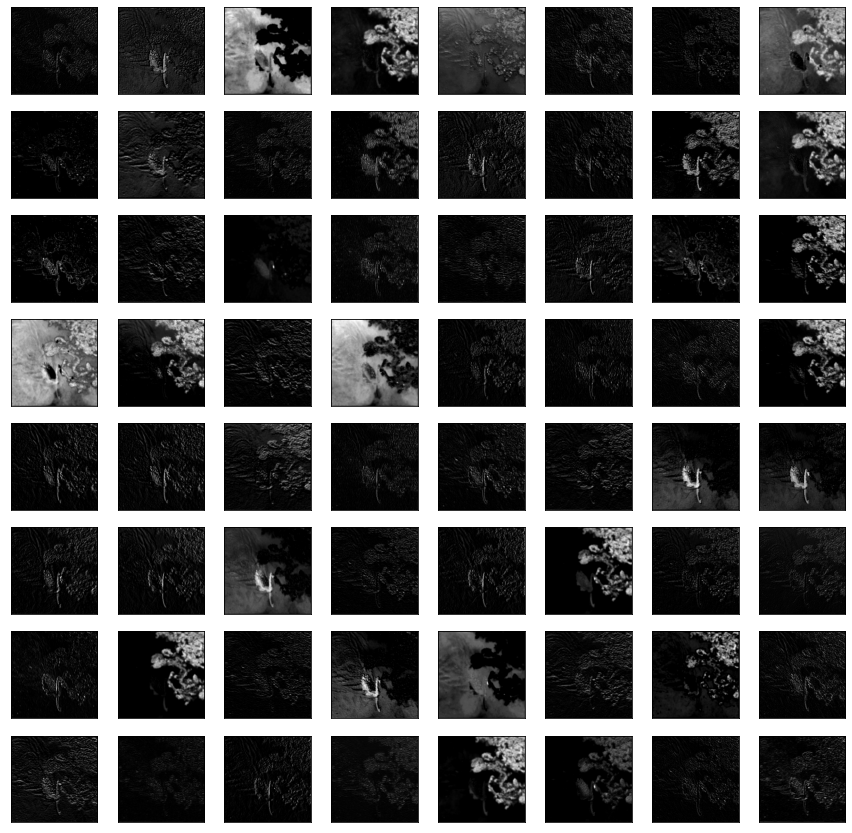

In [26]:
plt.figure(figsize=(15,15))
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, ix-1]c)
		ix += 1
plt.show()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
(1, 224, 224, 64)


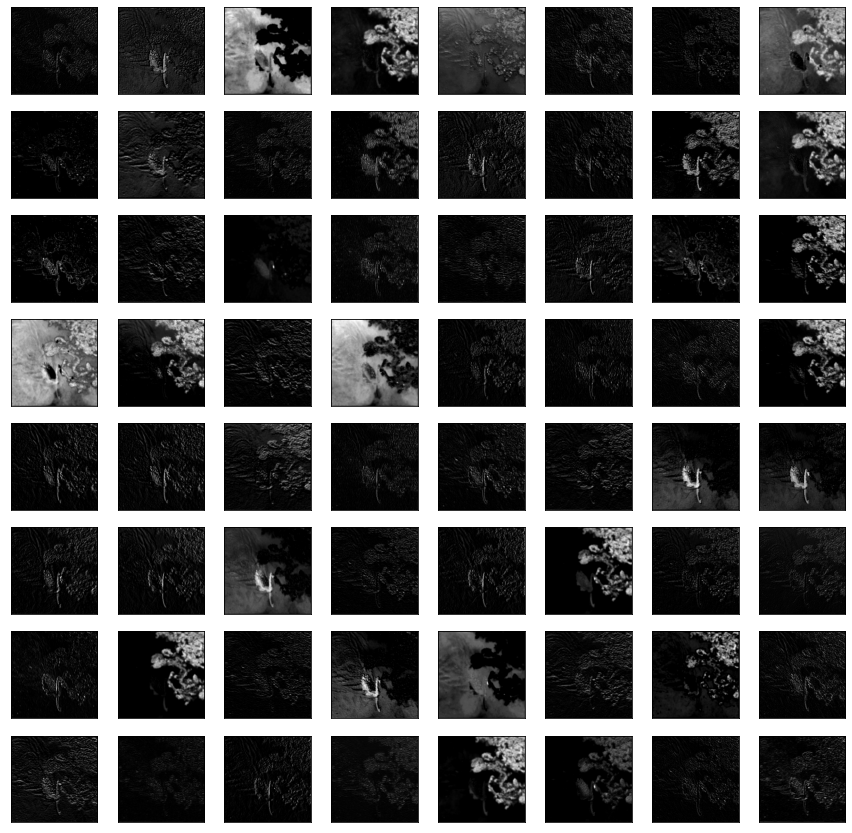

In [28]:
newmodel2 = Model(inputs=model.inputs, outputs=model.layers[2].output)
newmodel2.summary()

feature_maps = newmodel2.predict(img)

print(feature_maps.shape)

plt.figure(figsize=(15,15))
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
plt.show()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
(1, 112, 112, 64)


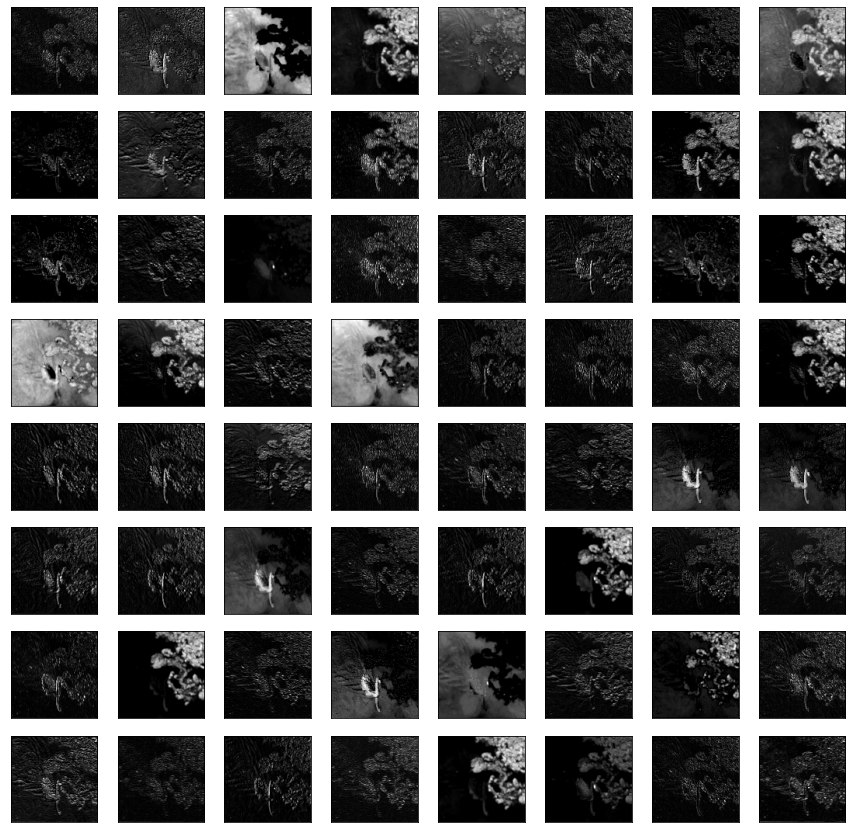

In [31]:
newmodel3 = Model(inputs=model.inputs, outputs=model.layers[3].output)
newmodel3.summary()

feature_maps = newmodel3.predict(img)

print(feature_maps.shape)
plt.figure(figsize=(15,15))
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])

		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
plt.show()

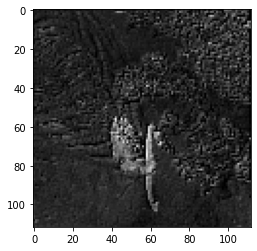

In [39]:
plt.imshow(feature_maps[0, :, :, 1], cmap='gray')
plt.show()

## Visualizar activaciones de salida utilizando mapas de calor

In [116]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Las zonas de activación de la imagen las podemos ver en la última capa convolucional, donde todavía l aimagen tiene las tres dimensiones. Veremos cuáles son los pesos que se activan más hasta la salida en el vgg16 y en el inception.

Vamos a calcular el índice de la clase resultante y vamos a calcular los gradientes para esta salida y los vamos a promediar.

Por último crearemos un mapa de color multiplicando estos gradientes promediados con la última capa, que nos dará la parte que se está activando.

In [117]:
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from numpy import expand_dims
import tensorflow.keras.backend as K

In [118]:
fileImage='/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg'
img = load_img(fileImage, target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

In [119]:
model_vgg16 = VGG16(weights="imagenet")
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [120]:
preds=model_vgg16.predict(img)
decode_predictions(preds, top=3)

[[('n01698640', 'American_alligator', 0.13828798),
  ('n01737021', 'water_snake', 0.07616778),
  ('n01860187', 'black_swan', 0.054756373)]]

In [126]:
with tf.GradientTape() as tape:
  last_conv_layer=model_vgg16.get_layer('block5_conv3')
  iterate=tf.keras.models.Model([model_vgg16.inputs],[model_vgg16.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(img)
  class_out=model_out[:, np.argmax(model_out[0])]
  grads=tape.gradient(class_out, last_conv_layer)
  pooled_grads=K.mean(grads,axis=(0,1,2))

heatmap=tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer),axis=-1)

In [127]:
heatmap.shape

TensorShape([1, 14, 14])

Maximizamos y normalizamos el mapa de calor y lo convertimos en 14x14, pues tenemos acá la representación de 196 rasgos. Y si observamos la última capa es justamente 14x14x512

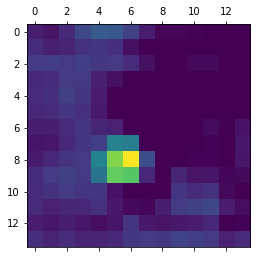

In [128]:
heatmap=np.maximum(heatmap, 0)
heatmap/=np.max(heatmap)
heatmap=heatmap.reshape((14,14))
plt.matshow(heatmap)
plt.show()

Cargar imagen orginal de nuevo

In [129]:
imgOrig=cv2.imread(fileImage)
imgOrig.shape

(2988, 5312, 3)

Vamos a reducir la imagen pues está muy grande

In [130]:
scale_percent = 15
width = int(imgOrig.shape[1] * scale_percent / 100)
height = int(imgOrig.shape[0] * scale_percent / 100)
dim = (width, height)
img_resized = cv2.resize(imgOrig, dim, interpolation = cv2.INTER_AREA)
img_resized.shape

(448, 796, 3)

Convertimos el mapa de color a color, lo llevamos a la escala de la imagen y se lo aplicamos a la imagen

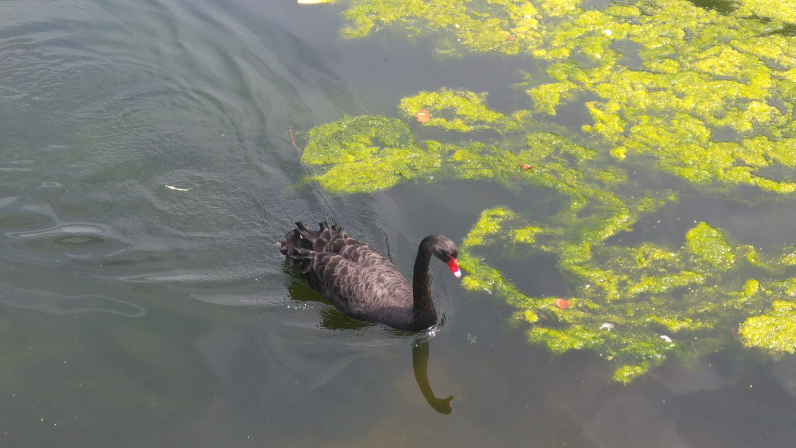

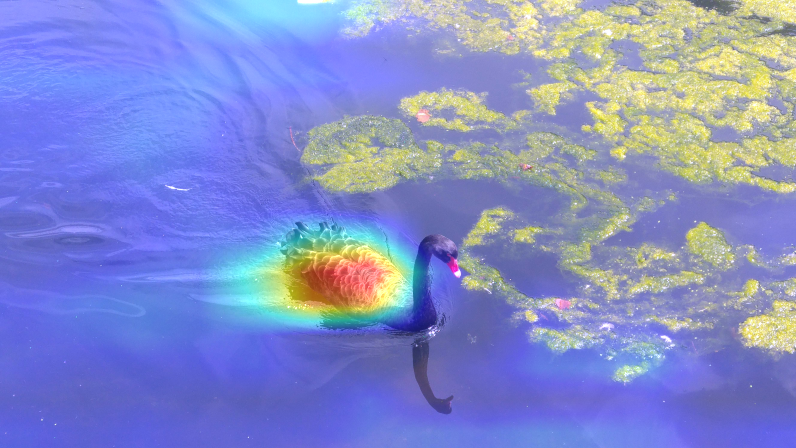

In [131]:
INTENSITY = 0.5
heatmap = cv2.resize(heatmap, (img_resized.shape[1],img_resized.shape[0]))
heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
imgHM_1 = heatmap * 0.5 + img_resized
cv2_imshow(img_resized)
cv2_imshow(imgHM_1)

In [132]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [134]:
model_vgg19=VGG19(weights='imagenet')
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [135]:
img=load_img(fileImage,target_size=(224,224))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [136]:
y=model_vgg19.predict(x)
decode_predictions(y, top=10)

[[('n01860187', 'black_swan', 0.12209354),
  ('n01698640', 'American_alligator', 0.07318385),
  ('n02099429', 'curly-coated_retriever', 0.064964),
  ('n01667778', 'terrapin', 0.063531436),
  ('n02133161', 'American_black_bear', 0.043162562),
  ('n01667114', 'mud_turtle', 0.039752126),
  ('n02177972', 'weevil', 0.037982184),
  ('n02102973', 'Irish_water_spaniel', 0.034854047),
  ('n02018207', 'American_coot', 0.029799597),
  ('n10565667', 'scuba_diver', 0.019532936)]]

In [163]:
def gradientModelDL (model,img,name_layer,imgOrig,scale_percent=100):
  with tf.GradientTape() as tape:
    last_conv_layer=model.get_layer(name_layer)
    iterate=tf.keras.models.Model([model.inputs],[model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(img)
    n=last_conv_layer.shape[1]
    class_out=model_out[:, np.argmax(model_out[0])]
    grads=tape.gradient(class_out, last_conv_layer)
    pooled_grads=K.mean(grads,axis=(0,1,2))
  #Disminuir la imagen
  width = int(imgOrig.shape[1] * scale_percent / 100)
  height = int(imgOrig.shape[0] * scale_percent / 100)
  dim = (width, height)
  img_resized = cv2.resize(imgOrig, dim, interpolation = cv2.INTER_AREA)
  heatmap=tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer),axis=-1)
  heatmap=np.maximum(heatmap, 0)
  heatmap/=np.max(heatmap)
  heatmap=heatmap.reshape((n,n))
  INTENSITY = 0.5
  heatmap = cv2.resize(heatmap, (img_resized.shape[1],img_resized.shape[0]))
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  imgHM = heatmap * INTENSITY + img_resized
  return img_resized,imgHM

In [164]:
name_layer='block5_conv4'
img_resized,imgHM=gradientModelDL(model_vgg19,x,name_layer, imgOrig, 15)

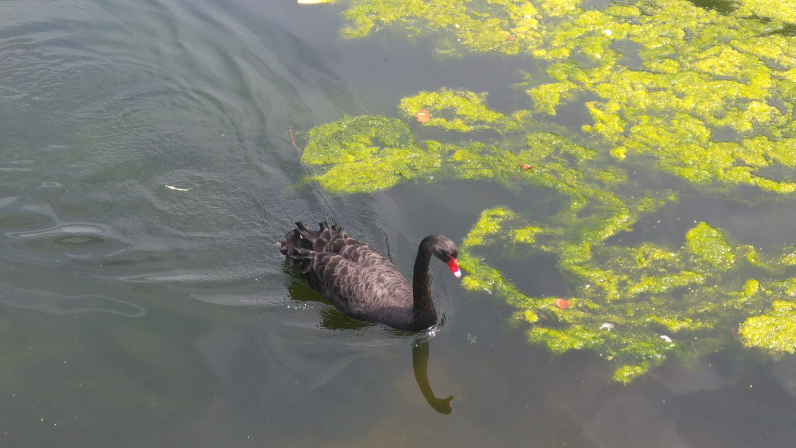

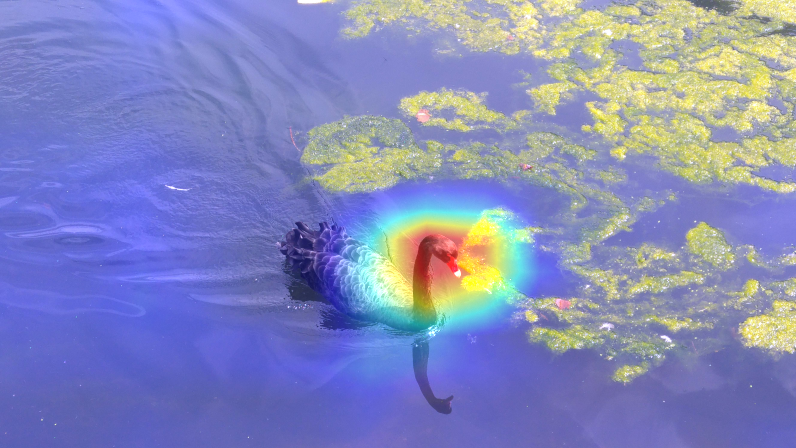

In [139]:
cv2_imshow(img_resized)
cv2_imshow(imgHM)

In [140]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

In [168]:
model_inception=InceptionV3(weights='imagenet')
model_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 149, 149, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 149, 149, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                      

In [169]:
img=load_img(fileImage,target_size=(299,299))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [170]:
y=model_inception.predict(x)
decode_predictions(y, top=3)

[[('n06359193', 'web_site', 0.99999976),
  ('n01930112', 'nematode', 2.1929209e-07),
  ('n04328186', 'stopwatch', 4.4925771e-10)]]

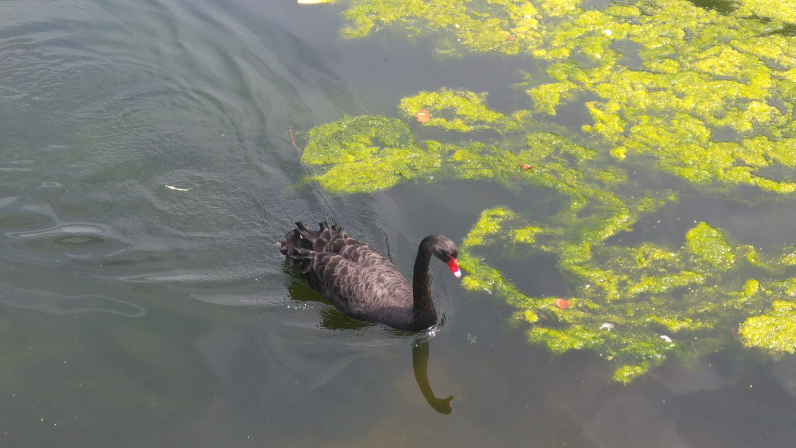

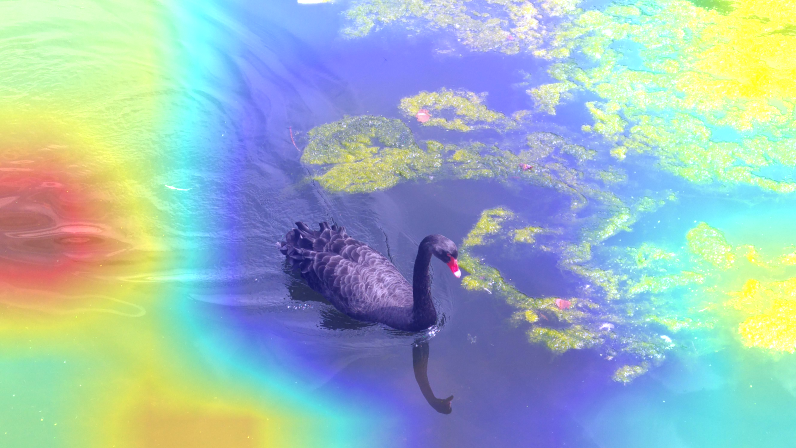

In [171]:
name_layer='mixed10'
img_resized,imgHM=gradientModelDL(model_inception,x,name_layer, imgOrig, 15)
cv2_imshow(img_resized)
cv2_imshow(imgHM)

In [172]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

In [173]:
model_resnet=ResNet50(weights='imagenet')
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [174]:
img=load_img(fileImage,target_size=(224,224))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [175]:
y=model_resnet.predict(x)
decode_predictions(y, top=3)

[[('n10565667', 'scuba_diver', 0.38180304),
  ('n09256479', 'coral_reef', 0.085111536),
  ('n11879895', 'rapeseed', 0.08263222)]]

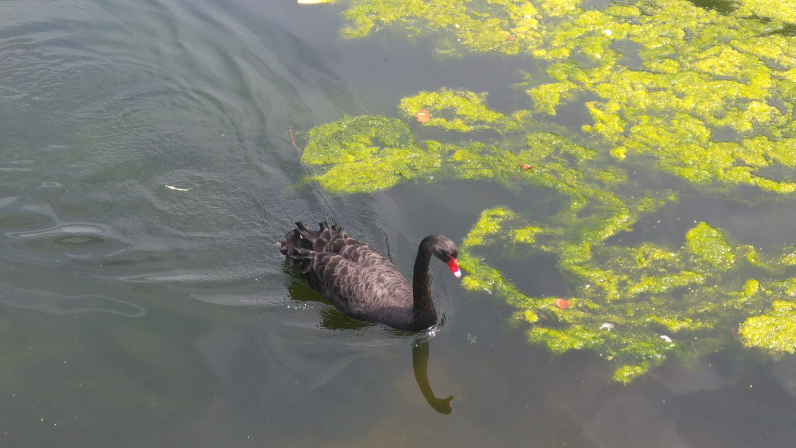

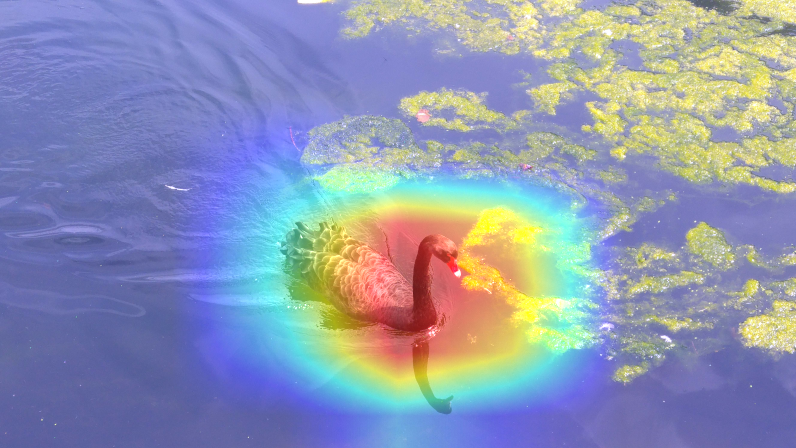

In [177]:
name_layer='conv5_block3_3_conv'
n=7
img_resized,imgHM=gradientModelDL(model_resnet,x,name_layer, imgOrig,15)
cv2_imshow(img_resized)
cv2_imshow(imgHM)